In [ ]:
# Parameters which can be changed everytime we run the below steps

# We have to change this hyperparameters
batch_size = 50
epochs = 50
learning_rate = 0.00001
#max_steps = 200

In [ ]:
!mkdir -p checkpoints

In [ ]:
!which pip
!pip install gdown

/usr/local/bin/pip
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None


In [ ]:
!apt update
!pip install --upgrade pip
!pip install gdown
!pip install imutils
!apt install -y cmake
!pip install dlib
!pip install opencv-python #Added for AWS
!pip install scikit-image  #Added for AWS
!pip install scipy==1.1.0

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:13 https://developer.download.nvidia.com/compute/

In [ ]:
# Importing the libraries
import numpy as np
import scipy
import h5py
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import imutils
import imageio
import skimage
from skimage import io
from skimage import transform
from matplotlib import pyplot as plt
from matplotlib import path
from scipy.misc.pilutil import imsave


# For generating masks
from imutils import face_utils
import collections
import dlib
from glob import glob
import shutil

In [ ]:
#!gdown https://drive.google.com/uc?id=1D7MYVPbn4JSVRZMQbQogfW2anmXLCKY7 (5.64gb file)
#!gdown https://drive.google.com/uc?id=1UQONt9Usk3PKztSIoXeNUEUqD5s6z69e (110gb file)
#tar xvzf file.tar.gz

# Downloading the Synthetic Data (944MB Sample)

!gdown https://drive.google.com/uc?id=18YVh0idJ9tNgrYluDJqsE3oY_dWVIJBE
#!gdown https://drive.google.com/uc?id=1UQONt9Usk3PKztSIoXeNUEUqD5s6z69e

Downloading...
From: https://drive.google.com/uc?id=18YVh0idJ9tNgrYluDJqsE3oY_dWVIJBE
To: /content/Syn_data.tar.gz
943MB [00:13, 68.5MB/s]


In [ ]:
# Downloading the CelebA Data
!gdown https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM #Download celebA dataset : filename=>img_align_celeba.zip
#!gdown https://drive.google.com/uc?id=1NjkXxViYxZF1-xB_3mfrTEyKTYqLea8s #Download Shape predictor landmarks : filename=>shape_predictor_68_face_landmar

Permission denied: https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM
Maybe you need to change permission over 'Anyone with the link'?


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!cp /content/gdrive/MyDrive/Copy\ of\ img_align_celeba.zip .
!mv Copy\ of\ img_align_celeba.zip img_align_celeba.zip

Mounted at /content/gdrive


In [ ]:
!wget https://github.com/davisking/dlib-models/raw/master/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

--2021-04-29 13:22:40--  https://github.com/davisking/dlib-models/raw/master/shape_predictor_68_face_landmarks.dat.bz2
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/davisking/dlib-models/master/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2021-04-29 13:22:50--  https://raw.githubusercontent.com/davisking/dlib-models/master/shape_predictor_68_face_landmarks.dat.bz2
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M   177MB/s    in 0.3s 

In [ ]:
!rm -rf SyntheticData

In [ ]:
!mkdir SyntheticData

In [ ]:
# Unzipping the Synthetic Data
#!unzip -q Syn_data.zip -d SyntheticData
!tar -C SyntheticData -xzvf Syn_data.tar.gz

Streaming output truncated to the last 5000 lines.
DATA_pose_15/0003/000047_face_3_2.png
DATA_pose_15/0003/000047_face_3_3.png
DATA_pose_15/0003/000047_face_3_4.png
DATA_pose_15/0003/000047_face_3_5.png
DATA_pose_15/0003/000047_light_1_1.txt
DATA_pose_15/0003/000047_normal_1_4.png
DATA_pose_15/0003/000047_normal_1_5.png
DATA_pose_15/0003/000047_normal_2_1.png
DATA_pose_15/0003/000047_normal_2_2.png
DATA_pose_15/0003/000047_normal_2_3.png
DATA_pose_15/0003/000047_normal_2_4.png
DATA_pose_15/0003/000047_normal_2_5.png
DATA_pose_15/0003/000047_normal_3_1.png
DATA_pose_15/0003/000047_normal_3_2.png
DATA_pose_15/0003/000047_normal_3_3.png
DATA_pose_15/0003/000047_normal_3_4.png
DATA_pose_15/0003/000047_normal_3_5.png
DATA_pose_15/0003/000048_albedo_1_1.png
DATA_pose_15/0003/000048_albedo_1_2.png
DATA_pose_15/0003/000048_albedo_1_3.png
DATA_pose_15/0003/000048_albedo_1_4.png
DATA_pose_15/0003/000048_albedo_1_5.png
DATA_pose_15/0003/000048_albedo_2_1.png
DATA_pose_15/0003/000048_albedo_2_2.pn

In [ ]:
# Unzipping the CelebA Data
!unzip -q img_align_celeba.zip -d CelebA

In [ ]:
!ls SyntheticData/DATA_pose_15

0001  0002  0003  0004	0005


In [ ]:
# Deleting the Zip files
!rm -rf Syn_data.tar.gz img_align_celeba.zip

In [ ]:
!ls

CelebA	     gdrive	  shape_predictor_68_face_landmarks.dat
checkpoints  sample_data  SyntheticData


In [ ]:
# Listing the path of all the celebA images
def listdir_fullpath(d):
    return [os.path.join(d, f) for f in os.listdir(d)]

list_img_full=listdir_fullpath('CelebA/img_align_celeba/')

In [ ]:
!rm -rf CelebA/output CelebA/nomask

In [ ]:
# Generating the masks
def face_remap(shape):
  remapped_image = cv2.convexHull(shape)
  return remapped_image

image_folder = 'CelebA/img_align_celeba/'
save_folder = 'CelebA/output/'
nomask_folder = 'CelebA/nomask/'

if not os.path.exists(save_folder):
  os.mkdir(save_folder)

if not os.path.exists(nomask_folder):
  os.mkdir(nomask_folder)

mask_count = 0

for i, image_path in enumerate(list_img_full):
   
  if(mask_count == (len(list_img_full) - (len(list_img_full) % batch_size))):
    break
  # read image
  image = io.imread(image_path)

  if i%500 == 0:
    print("Mask generation for "+ str(i) +" images are done")

  name = image_path.strip().split('/')[-1]
#   image = cv2.resize(image, (128,128))
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


  out_face = np.zeros((gray.shape[0], gray.shape[1]))
  SHAPE_PREDICTOR = 'shape_predictor_68_face_landmarks.dat'
  # initialize dlib's face detector (HOG-based) and then create the facial landmark predictor
  detector = dlib.get_frontal_face_detector()
  predictor = dlib.shape_predictor(SHAPE_PREDICTOR)

  # detect faces in the grayscale image
  rects = detector(gray, 1)
  mask_exists = False
  
  # loop over the face detections
  for (i, rect) in enumerate(rects):
    mask_count+=1
    """
    Determine the facial landmarks for the face region, then convert the facial landmark (x, y)-coordinates to a NumPy array
    """
    out_face = np.zeros((gray.shape[0], gray.shape[1]))
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)

    #initialize mask array
    remapped_shape = np.zeros_like(shape)

    feature_mask = np.zeros((image.shape[0], image.shape[1]))

    # we extract the face
    remapped_shape = face_remap(shape)
    cv2.fillConvexPoly(feature_mask, remapped_shape[0:27], 1)
    feature_mask = feature_mask.astype(np.bool)
    out_face[feature_mask] = gray[feature_mask]
    out_face = out_face * 255
    out_face = out_face.reshape(out_face.shape[0], out_face.shape[1], 1)
    out_face = np.tile(out_face, (1, 1, 3))
    cv2.imwrite(os.path.join(save_folder, name), out_face)
    mask_exists = True
  if mask_exists == False :
    mask_count-=1
    shutil.move(image_path, nomask_folder + "/" + name)
    print("Mask is not created for "+name+". Image is moved out!") 

Mask generation for 0 images are done
Mask is not created for 022911.jpg. Image is moved out!
Mask is not created for 119186.jpg. Image is moved out!


KeyboardInterrupt: ignored

In [ ]:
!ls CelebA/output

024964.jpg  046134.jpg	091056.jpg  126452.jpg	170936.jpg  188075.jpg
027005.jpg  051957.jpg	091790.jpg  130165.jpg	172094.jpg  188565.jpg
028199.jpg  054470.jpg	093267.jpg  131336.jpg	173567.jpg  190760.jpg
033074.jpg  055646.jpg	093477.jpg  133541.jpg	174465.jpg  194700.jpg
033757.jpg  057796.jpg	093796.jpg  151813.jpg	174580.jpg  201456.jpg
038124.jpg  060941.jpg	094575.jpg  152459.jpg	176252.jpg
039062.jpg  074603.jpg	102183.jpg  157374.jpg	179770.jpg
042153.jpg  080340.jpg	105784.jpg  161895.jpg	183802.jpg
043466.jpg  088633.jpg	113620.jpg  165875.jpg	185422.jpg
044266.jpg  089258.jpg	124862.jpg  169811.jpg	187561.jpg


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!cp -r CelebA /content/gdrive/MyDrive/CelebA  

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Saving the path of the images and it's normal, albedo, lighting and mask values in a list

image_list = []
normal_list = []
albedo_list = []
mask_list = []
light_list = []
depth_list = []
cwd = os.getcwd()

folder_count_skip = len(next(os.walk(cwd + '/SyntheticData/DATA_pose_15/'))[1])

# generating list for image, albedo, normal, lighting SH and mask in a similar order
for i in range(0,folder_count_skip):
  folder = str(i+1).zfill(4)
  print(folder)
  path = cwd + '/SyntheticData/DATA_pose_15/' + folder + '/'
  addrs = os.walk(path)
  for root, dirs, filename in addrs:
    filename.sort() 
    for file in filename:
      if (file.endswith(".png") and 'face' in file):
        image_list.append(os.path.join(root, file))       
      elif (file.endswith(".png") and 'albedo' in file):
        albedo_list.append(os.path.join(root, file))
      elif (file.endswith(".png") and 'normal' in file):
        normal_list.append(os.path.join(root, file))
      elif (file.endswith(".png") and 'mask' in file):
        mask_list.append(os.path.join(root, file))         
      elif (file.endswith(".txt")):
        light_list.append(os.path.join(root, file))
      elif (file.endswith(".png") and 'depth' in file):
        depth_list.append(os.path.join(root, file)) 

# converting list to array 
image_list = np.asarray(image_list)
albedo_list = np.asarray(albedo_list)
normal_list = np.asarray(normal_list)
light_list = np.asarray(light_list)
mask_list = np.asarray(mask_list)
depth_list = np.asarray(depth_list)

0001
0002
0003
0004
0005


In [ ]:
features = np.transpose(np.asarray([image_list, mask_list]))
labels = np.transpose(np.asarray([normal_list, albedo_list, light_list, depth_list]))

assert features.shape[0] == labels.shape[0]
print(features.shape)
print(labels.shape)

(1500, 2)
(1500, 4)


In [ ]:
# Assigning the index values for train and validation data
n_total = image_list.shape[0]
train_min_index = int(n_total * 0)
train_max_index = int(n_total * 0.8)
test_min_index = int((n_total * 0.8))
test_max_index = int(n_total * 1)


train_features = features[:train_max_index]
train_labels = labels[:train_max_index]
test_features = features[test_min_index:]
test_labels = labels[test_min_index:]

In [ ]:
@tf.function
# Input function for generating input pipeline for training and prediction
def images_input_fn(features, labels=None, perform_shuffle=False, repeat_count=1, batch_size=1):
  def _parse_function(feature, label):
    image = tf.io.read_file(feature[0])
    mask = tf.io.read_file(feature[1])
    image = tf.image.decode_png(image, channels=3)
    mask = tf.image.decode_png(mask, channels=3)
    # This will convert to float values in [0, 1]
    image = tf.image.convert_image_dtype(image, tf.float32)
    mask = tf.image.convert_image_dtype(mask, tf.float32)
    image = tf.image.resize(image, [128, 128])
    mask = tf.image.resize(mask, [128,128])
    # Labels
    normal = tf.io.read_file(label[0])
    albedo = tf.io.read_file(label[1])
    depth = tf.io.read_file(label[3])
    normal = tf.io.decode_png(normal, channels=3)
    albedo = tf.io.decode_png(albedo, channels=3)
    depth = tf.io.decode_png(depth, channels = 3)
    # This will convert to float values in [0, 1]
    normal = tf.image.convert_image_dtype(normal, tf.float32)
    albedo = tf.image.convert_image_dtype(albedo, tf.float32)
    depth = tf.image.convert_image_dtype(depth, tf.float32)
    # Resize image
    normal = tf.image.resize(normal, [128, 128])
    albedo = tf.image.resize(albedo, [128,128])
    depth = tf.image.resize(depth, [128, 128])
    # Light
    light = tf.io.read_file(label[2])
    
    return image, mask, normal, albedo, light, depth
    
  def _parse_function_label_none(feature, label):
    image = tf.io.read_file(feature[0])
    mask = tf.io.read_file(feature[1])
    image = tf.io.decode_jpeg(image, channels=3)
    mask = tf.io.decode_jpeg(mask, channels=3)
    # This will convert to float values in [0, 1]
    image = tf.image.convert_image_dtype(image, tf.float32)
    mask = tf.image.convert_image_dtype(mask, tf.float32)
    image = tf.image.resize(image, [128, 128])
    mask = tf.image.resize(mask, [128,128])
    
    return image, mask
  if labels is None:
    labels = [0]*len(features)
    dataset = tf.data.Dataset.from_tensor_slices((features, labels))
    if perform_shuffle is True:
      dataset = dataset.shuffle(features.shape[0])
    dataset = dataset.map(_parse_function_label_none, num_parallel_calls=4)
    dataset = dataset.repeat(repeat_count)  # Repeats dataset this # times
    dataset = dataset.batch(batch_size)  # Batch size to use
    iterator = iter(dataset)
    batch_images, batch_masks = iterator.get_next()
    return [batch_images, batch_masks], [None]
  else:
    dataset = tf.data.Dataset.from_tensor_slices((features, labels))
    if perform_shuffle is True:
      dataset = dataset.shuffle(features.shape[0])
    dataset = dataset.map(_parse_function, num_parallel_calls=4)
    dataset = dataset.repeat(repeat_count)  # Repeats dataset this # times
    dataset = dataset.batch(batch_size)  # Batch size to use
    iterator = iter(dataset)
    batch_images, batch_masks, batch_normals, batch_albedos, batch_lights, batch_depths = iterator.get_next()
    return [batch_images, batch_masks], [batch_normals, batch_albedos, batch_lights, batch_depths]

In [ ]:
# Model function for Estimator
def model_fn(features, labels, mode, params):
  """
    The defination of all the blocks to construct the network
    
    Args:
      features: images as dictionary
      labels: albedo, normal, lighting and depth values as dictionary
      mode: one of tf.estimator.ModeKeys.{TRAIN, INFER, EVAL}
      params: a parameter dictionary with the following keys: batch_size,
        learning_rate
    Returns:
      ModelFnOps for Estimator API.
  """
  
  def _get_input_tensors(features, labels):
    """Converts the input dict into image, albedo, normal and lighting tensors."""
    image = tf.multiply(features[0], features[1])
    albedo = None
    normal = None
    light = None
    depth = None
    if mode != tf.estimator.ModeKeys.PREDICT:
      albedo = labels[1]
      normal = labels[0]
      light = labels[2]
      depth = labels[3]
      function_to_map = lambda x: tf.strings.split([x], sep='\t').values
      light = tf.map_fn(function_to_map, light)
      light = tf.strings.to_number(
        light,
        out_type=tf.float32)
    
    return image, albedo, normal, light, depth
  
  def _encoder_layer(image):
    """Encoder block"""
    filters = [ 64, 128, 256, 256, 256]
    encoder_op_each_layer = []
    convolved = image
    for i in range(5):
      convolved = tf.keras.layers.Conv2D(
        filters = filters[i],
        kernel_size = 4,
        strides = 2,
        padding = "SAME",
        name = "encoder_conv2d_%d" % i)(convolved)
      if i > 0:
        convlved = tf.keras.layers.BatchNormalization(
          #convolved,
          #trainable=(mode == tf.estimator.ModeKeys.TRAIN),
          name = "encoder_batch_norm_%d" % i)(convolved, training=(mode == tf.estimator.ModeKeys.TRAIN))
      convolved = tf.nn.relu(
        convolved,
        name=None)
      # saving the output from each layer in a list which will be used for skip connection
      encoder_op_each_layer.append(convolved)
    flatten_output = tf.keras.layers.Flatten()(convolved)
    dense_output = tf.keras.layers.Dense(
      #flatten_output,
      256,
      name = "encoder_dense")(flatten_output)
    return dense_output, encoder_op_each_layer
  
  def _light_mlp(encoder_output):
    """Light MLP block"""
    light_mlp_output = tf.keras.layers.Dense(
      #encoder_output,
      256,
      name = "light_dense_layer1")(encoder_output)
    light_mlp_output = tf.keras.layers.Dense(
      #light_mlp_output,
      27,
      name = "light_dense_layer2")(light_mlp_output)
    return light_mlp_output
  
  def _albedo_mlp(encoder_output):
    """MLP block for albedo"""
    albedo_mlp_output = tf.keras.layers.Dense(
      #encoder_output,
      256,
      name = "albedo_mlp_dense_layer")(encoder_output)
    albedo_mlp_output = tf.reshape(
      albedo_mlp_output,
      [params['batch_size'], 1, 1, 256])
    albedo_mlp_output = tf.keras.layers.UpSampling2D((4, 4))(albedo_mlp_output)
    return albedo_mlp_output
  
  def _normal_mlp(encoder_output):
    """MLP block for normal"""
    normal_mlp_output = tf.keras.layers.Dense(
      #encoder_output,
      256,
      name = "normal_mlp_dense_layer"
    )(encoder_output)
    normal_mlp_output = tf.reshape(
      normal_mlp_output,
      [params['batch_size'], 1, 1, 256])
    normal_mlp_output = tf.keras.layers.UpSampling2D((4, 4))(normal_mlp_output)
    return normal_mlp_output

  def _depth_mlp(encoder_output):
    """MLP block for depth"""
    depth_mlp_output = tf.keras.layers.Dense(
      #encoder_output,
      256,
      name = "depth_mlp_dense_layer"
    )(encoder_output)
    depth_mlp_output = tf.reshape(
      depth_mlp_output,
      [params['batch_size'], 1, 1, 256])
    depth_mlp_output = tf.keras.layers.UpSampling2D((4, 4))(depth_mlp_output)
    return depth_mlp_output

  def _albedo_decoder(albedo_mlp_output, encoder_op_each_layer):
    """Decoder block for albedo"""
    filters = [ 256, 256, 256, 128, 64]
    deconvolved = albedo_mlp_output

    for i in range(5):
      deconvolved_input = deconvolved
      deconvolved_input = tf.concat(
        [deconvolved, encoder_op_each_layer[5-(i+1)]],
        3)
      deconvolved = tf.keras.layers.Conv2DTranspose(
        #deconvolved_input,
        filters = filters[i],
        kernel_size = 4,
        strides = 2,
        padding = "SAME",
        name = "albedo_decoder_deconv2d_%d" % i)(deconvolved_input)
      deconvlved = tf.keras.layers.BatchNormalization(
        #deconvolved,
        #training=(mode == tf.estimator.ModeKeys.TRAIN),
        name = "albedo_decoder_batch_norm_%d" % i)(deconvolved, training=(mode == tf.estimator.ModeKeys.TRAIN))
      deconvolved = tf.nn.relu(
        deconvolved,
        name=None)
    albedo_decoder_output = tf.keras.layers.Conv2D(
        #deconvolved,
        filters = 3,
        kernel_size = 1,
        name = "albedo_decoder_conv2d")(deconvolved)
    return albedo_decoder_output
  
  def _normal_decoder(normal_mlp_output, encoder_op_each_layer):
    """Decoder block for normal"""
    filters = [ 256, 256, 256, 128, 64]
    deconvolved = normal_mlp_output
    for i in range(5):
      deconvolved_input = tf.concat(
          [deconvolved, encoder_op_each_layer[5-(i+1)]],
          3)
      deconvolved = tf.keras.layers.Conv2DTranspose(
        #deconvolved_input,
        filters = filters[i],
        kernel_size = 4,
        strides = 2,
        padding = "SAME",
        name = "normal_decoder_deconv2d_%d" % i)(deconvolved_input)
      deconvlved = tf.keras.layers.BatchNormalization(
        #deconvolved,
        #training=(mode == tf.estimator.ModeKeys.TRAIN),
        name = "normal_decoder_batch_norm_%d" % i)(deconvolved, training=(mode == tf.estimator.ModeKeys.TRAIN))
      deconvolved = tf.nn.relu(
        deconvolved,
        name=None)
    normal_decoder_output = tf.keras.layers.Conv2D(
        #deconvolved,
        filters = 3,
        kernel_size = 1,
        name = "normal_decoder_conv2d")(deconvolved)
    return normal_decoder_output

  def _depth_decoder(depth_mlp_output, encoder_op_each_layer):
    """Decoder block for depth"""
    filters = [ 256, 256, 256, 128, 64]
    deconvolved = depth_mlp_output
    for i in range(5):
      deconvolved_input = tf.concat(
          [deconvolved, encoder_op_each_layer[5-(i+1)]],
          3)
      deconvolved = tf.keras.layers.Conv2DTranspose(
        #deconvolved_input,
        filters = filters[i],
        kernel_size = 4,
        strides = 2,
        padding = "SAME",
        name = "depth_decoder_deconv2d_%d" % i)(deconvolved_input)
      deconvlved = tf.keras.layers.BatchNormalization(
        #deconvolved,
        #training=(mode == tf.estimator.ModeKeys.TRAIN),
        name = "depth_decoder_batch_norm_%d" % i)(deconvolved, training=(mode == tf.estimator.ModeKeys.TRAIN))
      deconvolved = tf.nn.relu(
        deconvolved,
        name=None)
    depth_decoder_output = tf.keras.layers.Conv2D(
        #deconvolved,
        filters = 3,
        kernel_size = 1,
        name = "depth_decoder_conv2d")(deconvolved)
    return depth_decoder_output

  # Build the model
  image, albedo, normal, light, depth = _get_input_tensors(features, labels)
  encoder_output, encoder_op_each_layer = _encoder_layer(image)
  light_mlp_output = _light_mlp(encoder_output)
  albedo_mlp_output = _albedo_mlp(encoder_output)
  normal_mlp_output = _normal_mlp(encoder_output)
  depth_mlp_output = _depth_mlp(encoder_output)
  albedo_decoder_output = _albedo_decoder(albedo_mlp_output, encoder_op_each_layer)
  normal_decoder_output = _normal_decoder(normal_mlp_output, encoder_op_each_layer)
  depth_decoder_output = _depth_decoder(depth_mlp_output, encoder_op_each_layer)
  #returning estimator if the modoe is predict
  if mode == tf.estimator.ModeKeys.PREDICT:
    print(image)
    return tf.estimator.EstimatorSpec(
      mode=mode,
      predictions={
          "image": image,
          "mask": features[1],
          "normal": normal_decoder_output,
          "albedo": albedo_decoder_output,
          "light": light_mlp_output,
          "depth": depth_decoder_output})
  else:
    # Add the loss
    normal_loss = tf.keras.losses.MeanAbsoluteError()(normal, normal_decoder_output)
    albedo_loss = tf.keras.losses.MeanAbsoluteError()(albedo, albedo_decoder_output)
    lighting_loss = tf.losses.mean_squared_error(light, light_mlp_output)
    depth_loss = tf.keras.losses.MeanAbsoluteError()(depth, depth_decoder_output)
    final_loss = tf.reduce_mean(0.5*normal_loss + 0.5*albedo_loss + 0.1*lighting_loss + 0.5*depth_loss)
    tf.print(final_loss)
    # Add the optimizer
    opt = tf.compat.v1.train.AdamOptimizer(learning_rate = params['learning_rate'])
    minimize_op = opt.minimize(loss=final_loss, global_step=tf.compat.v1.train.get_global_step())
    train_op = minimize_op

    return tf.estimator.EstimatorSpec(
      mode=mode,
      predictions={
          "normal": normal_decoder_output,
          "albedo": albedo_decoder_output,
          "light": light_mlp_output,
          "depth": depth_mlp_output},
      loss=final_loss,
      train_op=train_op,
      eval_metric_ops={
          "albedo_loss": tf.compat.v1.metrics.mean_squared_error(labels=albedo, predictions=albedo_decoder_output),
          "normal_loss": tf.compat.v1.metrics.mean_squared_error(labels=normal, predictions=normal_decoder_output),
          "lighting_loss": tf.compat.v1.metrics.mean_squared_error(labels=light, predictions=light_mlp_output),
          "depth_loss": tf.compat.v1.metrics.mean_squared_error(labels=depth, predictions=depth_decoder_output)})

In [ ]:
def create_estimator_and_specs(run_config):
  """Creates an Experiment configuration based on the estimator and input fn."""
  model_params = {'learning_rate': learning_rate, 'batch_size': batch_size}

  estimator = tf.estimator.Estimator(
    model_fn=model_fn,
    config=run_config,
    params=model_params)
  
  train_spec = tf.estimator.TrainSpec(
    input_fn=lambda: images_input_fn(
      train_features,
      labels=train_labels,
      perform_shuffle=True,
      repeat_count=epochs,
      batch_size=batch_size))
  
  eval_spec = tf.estimator.EvalSpec(
    input_fn=lambda: images_input_fn(
      test_features,
      labels=test_labels,
      perform_shuffle=False,
      batch_size=batch_size),
    steps=10,
    name='validation',
    start_delay_secs=150,
    throttle_secs=200)

  return estimator, train_spec, eval_spec

In [ ]:
!rm -rf checkpoints/SGD

In [ ]:
!mkdir checkpoints/SGD

In [ ]:
estimator, train_spec, eval_spec = create_estimator_and_specs(
    run_config=tf.estimator.RunConfig(
        model_dir="./checkpoints/SGD",
        save_checkpoints_steps=100,
        save_summary_steps=500))
tf.estimator.train_and_evaluate(estimator, train_spec, eval_spec)

INFO:tensorflow:Using config: {'_model_dir': './checkpoints/SGD', '_tf_random_seed': None, '_save_summary_steps': 500, '_save_checkpoints_steps': 100, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Not using Distribute Coordinator.
INFO:tensorflow:Running training and evaluation locally (non-distrib

In [ ]:
!cp -r checkpoints gdrive/MyDrive/

In [ ]:
# Listing the path for all the celeba mask images
def listdir_fullpath(d):
    return [os.path.join(d, f) for f in os.listdir(d)]

celeba_mask_list=listdir_fullpath('CelebA/output/')

In [ ]:
# Listing the path for all the celeba images which has mask
celeba_list = []
for i in celeba_mask_list:
  celeba_list.append(i.replace("output","img_align_celeba"))

In [ ]:
len(celeba_list)

55

In [ ]:
# Input function for prediction
celeba_features = np.transpose(np.asarray([celeba_list, celeba_mask_list]))
predict_input_fn = lambda: images_input_fn(
      celeba_features,
      perform_shuffle=False,
      batch_size=batch_size)

In [ ]:
!rm -rf predicted_data_B

In [ ]:
folder_count_celeba = 0
image_count = 0
images_in_folder = 40
predicted_images_path = "predicted_data_B"
current_folder_path = ""

In [ ]:
if not os.path.exists(predicted_images_path):
    os.makedirs(predicted_images_path)

In [ ]:
for i in estimator.predict(input_fn=predict_input_fn):
  if(image_count % images_in_folder == 0):
    folder_count_celeba = folder_count_celeba + 1
    current_folder_path = predicted_images_path + '/' + str(folder_count_celeba).zfill(4)
    os.makedirs(current_folder_path)
  img_path = current_folder_path + '/' + str(image_count).zfill(6) + '_img.png'
  mask_path = current_folder_path + '/' + str(image_count).zfill(6) + '_mask.png'
  normal_path = current_folder_path + '/' + str(image_count).zfill(6) + '_normal.png'
  albedo_path = current_folder_path + '/' + str(image_count).zfill(6) + '_albedo.png'
  light_path = current_folder_path + '/' + str(image_count).zfill(6) + '_light.txt'
  depth_path = current_folder_path + '/' + str(image_count).zfill(6) + '_depth.png'
  imsave(img_path, i["image"])
  imsave(mask_path, i["mask"])
  imsave(normal_path, i["normal"])
  imsave(albedo_path, i["albedo"])
  imsave(depth_path, i["depth"])
  light_array = '\t'.join(str(e) for e in i["light"])
  with open(light_path, 'w+') as file:
    file.write(light_array)
#   np.savetxt(light_path, , delimiter='\t')
  image_count = image_count + 1

INFO:tensorflow:Calling model_fn.
Tensor("Mul:0", shape=(None, 128, 128, 3), dtype=float32)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./checkpoints/SGD/model.ckpt-2800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:     `imsave` is deprecated!
    `imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imwrite`` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning:     `imsave` is deprecated!
    `imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imwrite`` instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning:     `imsave` is deprecated!
    `imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imwrite`` instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning:     `imsave` is deprecated!
    `imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imwrite`` instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3

KeyboardInterrupt: ignored

In [ ]:
!cat "predicted_data/0001/000000_light.txt"

0.38339046	0.9739394	0.2977482	0.4895407	-0.31905746	-0.2784383	0.51380163	-0.25611216	-0.33263177	0.5222719	-0.32415947	0.50568753	0.067934595	0.15095383	-0.03838309	0.22259839	-0.432076	-0.11217412	0.024990508	-0.25304344	-0.49573627	-0.18797123	-0.5730268	-0.3012482	-0.19109604	0.21742101	0.09841142

Text(0.5, 1.0, 'depth')

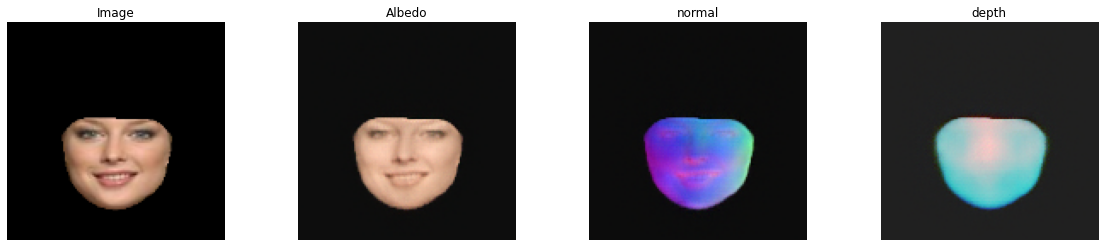

In [ ]:
fig, axs = plt.subplots(1,4,figsize=(20, 4))

d = io.imread("predicted_data/0001/000000_img.png")
axs[0].imshow(d)
axs[0].axis('off')
axs[0].set_title('Image')

d = io.imread("predicted_data/0001/000000_albedo.png")
axs[1].imshow(d)
axs[1].axis('off')
axs[1].set_title('Albedo')

d = io.imread("predicted_data/0001/000000_normal.png")
axs[2].imshow(d)
axs[2].axis('off')
axs[2].set_title('normal')

d = io.imread("predicted_data/0001/000000_depth.png")
axs[3].imshow(d)
axs[3].axis('off')
axs[3].set_title('depth')


Text(0.5, 1.0, 'depth')

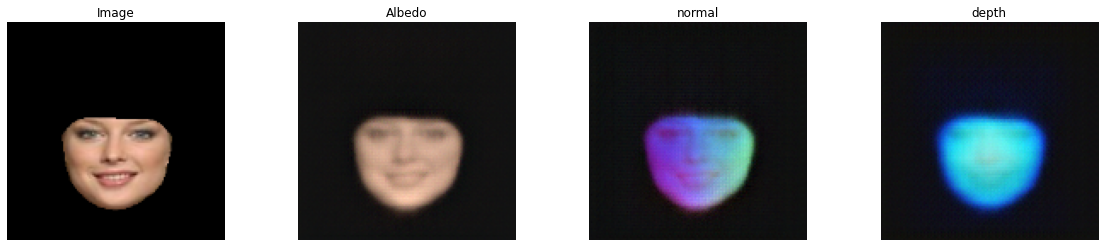

In [ ]:
fig, axs = plt.subplots(1,4,figsize=(20, 4))

d = io.imread("predicted_data_B/0001/000000_img.png")
axs[0].imshow(d)
axs[0].axis('off')
axs[0].set_title('Image')

d = io.imread("predicted_data_B/0001/000000_albedo.png")
axs[1].imshow(d)
axs[1].axis('off')
axs[1].set_title('Albedo')

d = io.imread("predicted_data_B/0001/000000_normal.png")
axs[2].imshow(d)
axs[2].axis('off')
axs[2].set_title('normal')

d = io.imread("predicted_data_B/0001/000000_depth.png")
axs[3].imshow(d)
axs[3].axis('off')
axs[3].set_title('depth')


In [ ]:
!ls checkpoints/events.out.tfevents.1619663617.0cdfa6a78e98
!ls checkpoints/eval_validation/events.out.tfevents.1619663746.0cdfa6a78e98


In [ ]:
!ls checkpoints/with_noskipnet/eval_validation/events.out.tfevents.1619725713.479f7ad5fdf8

In [ ]:
for e in tf.compat.v1.train.summary_iterator('checkpoints/with_noskipnet/eval_validation/events.out.tfevents.1619725713.479f7ad5fdf8'):
  for v in e.summary.value:
    if v.tag == 'loss':
        print(v.simple_value)

0.3635289669036865
0.23018857836723328
0.19690480828285217
0.1859515756368637
0.18020276725292206
0.1766577661037445
0.17592786252498627
0.17224515974521637
0.17028182744979858
0.16951456665992737
0.16820646822452545
0.16943864524364471
0.16693803668022156
0.16617213189601898
0.16517327725887299
0.16474591195583344
0.16324710845947266
0.16250978410243988
0.16174766421318054
0.16118334233760834
0.16087116301059723
0.1601095199584961
0.15890945494174957
0.1589120477437973
0.15799525380134583
0.15764120221138
0.15970709919929504
0.15630076825618744
0.15563179552555084
0.15537847578525543
0.15528450906276703
0.15527963638305664
0.15424500405788422
0.15402854979038239
0.1537633091211319
0.15388374030590057
0.15303106606006622
0.15462136268615723
0.15248848497867584
0.1521826833486557
0.15164542198181152
0.1511383354663849
0.1510685831308365
0.1503179371356964
0.1526765674352646
0.15026254951953888
0.14943547546863556
0.14947839081287384
0.14870798587799072
0.15012623369693756
0.148762702941

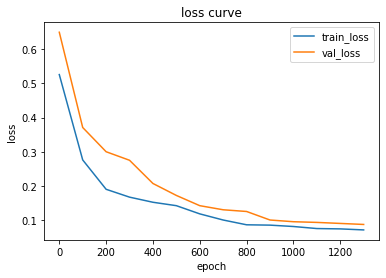